In the [previous part](http://earthpy.org/pandas-basics.html) we looked at very basic ways of work with pandas. Here I am going to introduce couple of more advance tricks. We will use very powerful pandas IO capabilities to create time series directly from the text file, try to create seasonal means with *resample* and multi-year monthly means with *groupby*.

Import usual suspects and change some output formatting:

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
pd.set_option('max_rows',15) # this limit maximum numbers of rows

## Load data

We load data from two files, parse their dates and create Dataframe

In [2]:
ham_tmin = pd.read_csv('./Ham_tmin.txt', parse_dates=True, index_col=0, names=['Time','tmin'])
ham_tmax = pd.read_csv('./Ham_tmax.txt', parse_dates=True, index_col=0, names=['Time','tmax'])

In [3]:
tm = pd.DataFrame({'TMAX':ham_tmax.tmax/10.,'TMIN':ham_tmin.tmin/10.})

In [4]:
tm

,TMAX,TMIN
Time,,
1891-01-01 00:00:00,-7.2,-13.2
1891-01-02 00:00:00,-4.3,-11.9
1891-01-03 00:00:00,-3.2,-11.6
1891-01-04 00:00:00,1.2,-10.8
1891-01-05 00:00:00,-2.9,-3.7
1891-01-06 00:00:00,-4.3,-5.8
1891-01-07 00:00:00,-3.7,-5.8
...,...,...
2014-08-25,16.7,5.6


## Seasonal means with resample

Initially pandas was created for analysis of financial information and it thinks not in seasons, but in quarters. So we have to resample our data to quarters. We also need to make a shift from standard quarters, so they correspond with seasons. This is done by using 'Q-NOV' as a time frequency, indicating that year in our case ends in November: 

In [5]:
tmd = tm.to_period(freq='D')

In [11]:
tmd.resample('Q-NOV').head()

,TMAX,TMIN
Time,,
1891Q1,0.988136,-3.598305
1891Q2,9.996739,3.652174
1891Q3,18.960870,12.502174
1891Q4,12.731868,7.449451
1892Q1,2.796703,-1.213187


In [12]:
q_mean = tm.resample('Q-NOV')

In [13]:
q_mean.head()

,TMAX,TMIN
Time,,
1891-02-28 00:00:00,0.988136,-3.598305
1891-05-31 00:00:00,9.996739,3.652174
1891-08-31 00:00:00,18.960870,12.502174
1891-11-30 00:00:00,12.731868,7.449451
1892-02-29 00:00:00,2.796703,-1.213187


Winter temperatures

In [17]:
q_mean.index.quarter

array([1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3,
       4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2,
       3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1,
       2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
       1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3,
       4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2,
       3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1,
       2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
       1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3,
       4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2,
       3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1,
       2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
       1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3,
       4, 1,

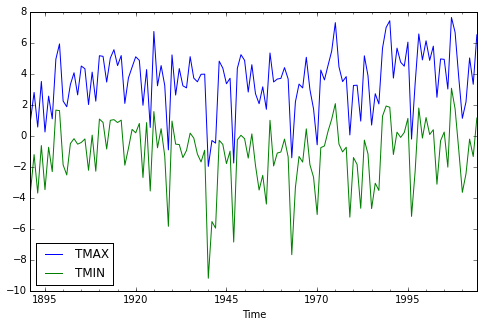

In [18]:
q_mean[q_mean.index.quarter==1].plot(figsize=(8,5))

##Exercise

Plot summer mean

If you don't mind to sacrifice first two months (that strictly speaking can't represent the whole winter of 1890-1891), there is another way to do similar thing by just resampling to 3M (3 months) interval starting from March (third data point):

In [19]:
tm[59:63]

,TMAX,TMIN
Time,,
1891-03-01 00:00:00,8.0,2.2
1891-03-02 00:00:00,8.6,5.8
1891-03-03 00:00:00,6.2,2.2
1891-03-04 00:00:00,6.9,-0.1


In [32]:
m3_mean = tm[59:].resample('3M', closed='left')

In [33]:
m3_mean.head()

,TMAX,TMIN
Time,,
1891-05-31 00:00:00,9.870330,3.548352
1891-08-31 00:00:00,18.976087,12.510870
1891-11-30 00:00:00,12.913187,7.578022
1892-02-29 00:00:00,2.804396,-1.220879
1892-05-31 00:00:00,10.418478,2.928261


Results are different, let's find out wich one is wrong, or maybe we did something silly?

In [29]:
tm[59:151]

,TMAX,TMIN
Time,,
1891-03-01 00:00:00,8.0,2.2
1891-03-02 00:00:00,8.6,5.8
1891-03-03 00:00:00,6.2,2.2
1891-03-04 00:00:00,6.9,-0.1
1891-03-05 00:00:00,8.6,3.2
1891-03-06 00:00:00,6.8,5.3
1891-03-07 00:00:00,3.6,0.1
...,...,...
1891-05-25 00:00:00,18.5,10.1


Now in order to select all winter months we have to choose Februaries (last month of the season):

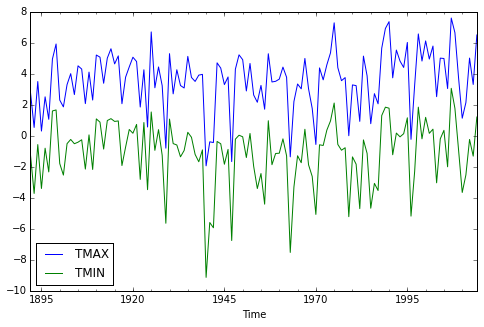

In [34]:
m3_mean[m3_mean.index.month==2].plot(figsize=(8,5))

Result is the same except for the first point.

##Exercise
Calculate 10 day intervals

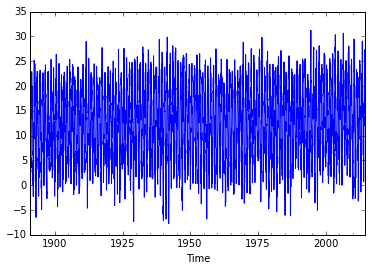

In [43]:
tm.resample('10D', closed='left')['TMAX'].plot()

## Multi-year monthly means with *groupby*

 <img src="files/splitApplyCombine.png">

First step will be to add another column to our DataFrame with month numbers:

In [37]:
tm['mon'] = tm.index.month
tm

,TMAX,TMIN,mon
Time,,,
1891-01-01 00:00:00,-7.2,-13.2,1
1891-01-02 00:00:00,-4.3,-11.9,1
1891-01-03 00:00:00,-3.2,-11.6,1
1891-01-04 00:00:00,1.2,-10.8,1
1891-01-05 00:00:00,-2.9,-3.7,1
1891-01-06 00:00:00,-4.3,-5.8,1
1891-01-07 00:00:00,-3.7,-5.8,1
...,...,...,...
2014-08-25,16.7,5.6,8


Now we can use [*groupby*](http://pandas.pydata.org/pandas-docs/stable/groupby.html) to group our values by months and calculate mean for each of the groups (month in our case):

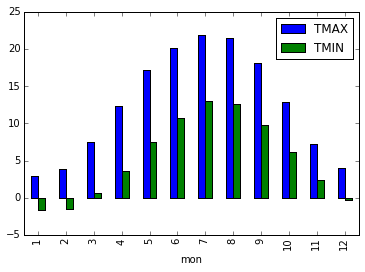

In [38]:
monmean = tm.groupby('mon').aggregate(np.mean)
monmean.plot(kind='bar')


##Exercise
 - Calculate and plot monthly mean temperatures for 1891-1950 and 1951-2010
 - Calculate and plot differences between this two variables

Sometimes it is useful to look at the [box plots](http://en.wikipedia.org/wiki/Box_plot) for every month:

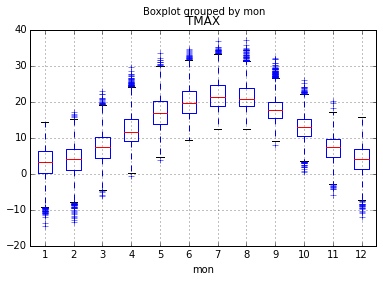

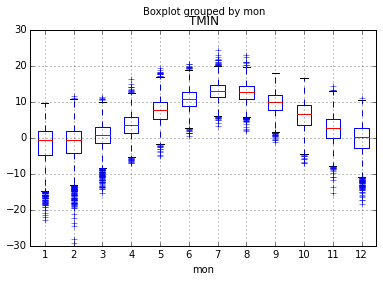

In [39]:
ax = tm.boxplot(column=['TMAX'], by='mon')
ax = tm.boxplot(column=['TMIN'], by='mon')